In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [8]:
data= pd.read_csv("/kaggle/input/graduates-admission-prediction/admission_data.csv")

In [9]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [20]:
y = data['Chance of Admit ']
X= data.drop('Chance of Admit ', axis =1) 

In [21]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [22]:
pca= PCA(n_components=2)
pca.fit(X)
X_PCA= pca.transform(X)

In [26]:
X_PCA=pd.DataFrame(X_PCA, columns=['pca1','pca2'])
X_PCA

,pca1,pca2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


TypeError: 'str' object is not callable

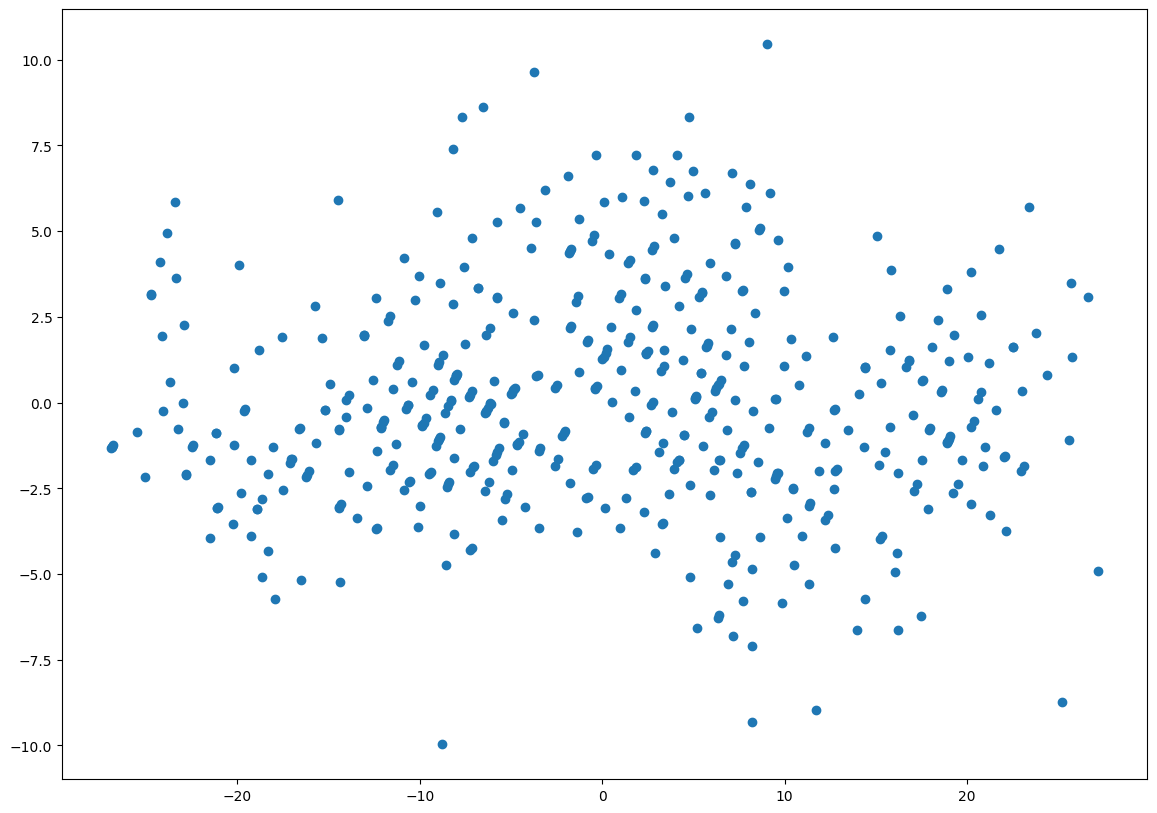

In [36]:
plt.figure(figsize=(14,10))
plt.scatter(X_PCA['pca1'],X_PCA['pca2'])


In [39]:
PCA_max=np.argmax(X_PCA['pca1'])
PCA_min=np.argmin(X_PCA['pca1'])

In [40]:
print(PCA_max)
print(PCA_min)

377
202


In [42]:
print(X,377)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns] 377


In [44]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [46]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,shuffle=True)

In [51]:
model = LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [52]:
model.score(X_test,y_test)

0.8440254764561359

In [54]:
pred = model.predict(X_test)
pred

array([0.62943873, 0.62912347, 0.70131509, 0.94316273, 0.91283998,
       0.57396484, 0.79689027, 0.88533439, 0.51113626, 0.57801845,
       0.6049465 , 0.79293521, 0.77386477, 0.80711577, 0.90856812,
       0.75215809, 0.52169784, 0.93206195, 0.4922277 , 0.53904801,
       0.71378292, 0.96210225, 0.64767498, 0.73431531, 0.67798781,
       0.90137501, 0.58736017, 0.88047642, 0.5365893 , 0.43735496,
       0.70880275, 0.63833485, 0.60616136, 0.69539305, 0.72544124,
       0.62306724, 0.52413546, 0.85412153, 0.61327889, 0.90844966,
       0.94734273, 0.47861406, 0.57985408, 0.80073968, 0.84588369,
       0.72059174, 0.73196363, 0.94848315, 0.80684974, 0.86008075,
       0.747369  , 0.79702296, 0.71516152, 0.80009988, 0.65864819,
       0.83868311, 0.60359818, 0.78018918, 0.60399409, 0.63237526,
       0.85831346, 0.51239594, 0.57387509, 0.59111977, 0.66566625,
       0.55211425, 0.54972053, 0.71986378, 0.55936562, 0.89786221,
       0.80472405, 0.76861054, 0.72622528, 0.65618516, 0.57703

TypeError: 'str' object is not callable

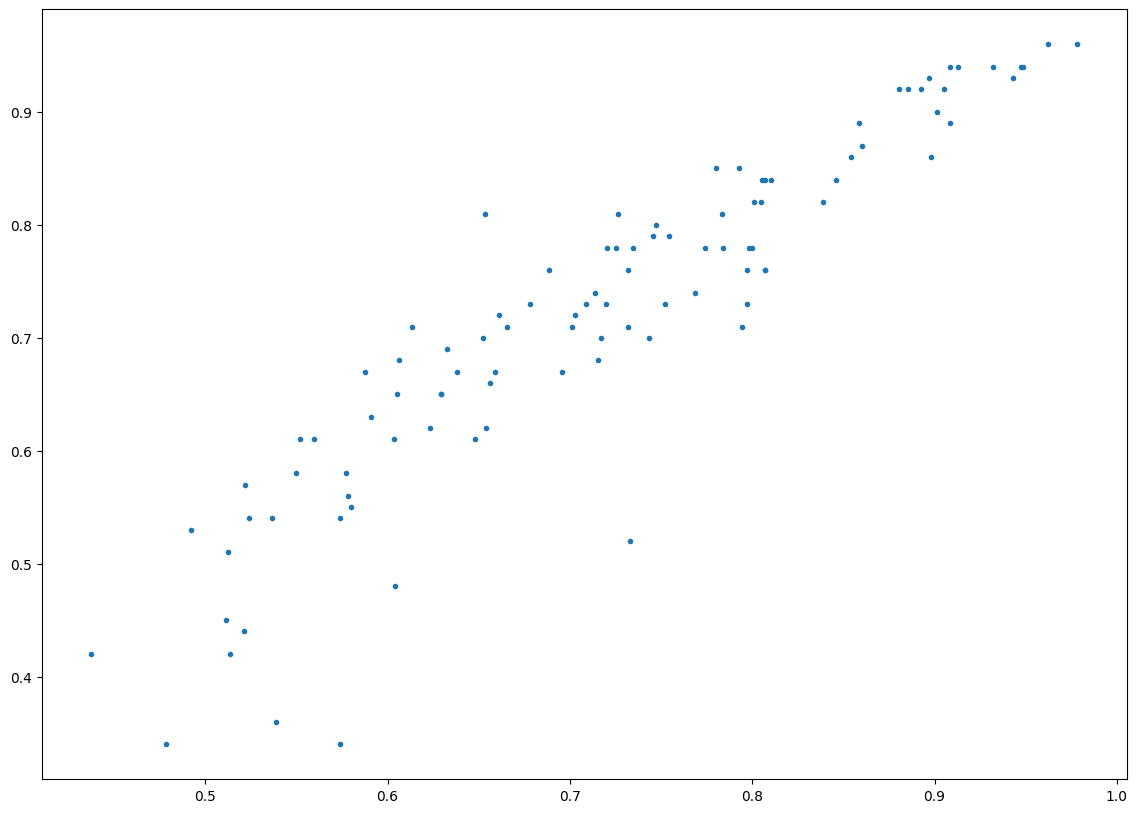

In [55]:
plt.figure(figsize=(14,10))
plt.plot(pred,y_test, '.')
plt.xlabel('Predicted value')                           
plt.ylabel('Actual value')

The overall code is working fine just a line of code throwing error is the label func.
**TypeError: 'str' object is not callable**